# Annotation on GRN
## 08-6_annotation_on_grns
---
- load grn matrix
- comparison

In [1]:
import glob
import json
import os
from typing import NamedTuple, Dict, Union

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from tools.figure import minimal_preset, fig_kwarg
from tools.grn import annot_plot

In [2]:
class Config(NamedTuple):
    save_dir: str = f"../out/annotation"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_file: bool = False

conf = Config(save_file=True)
os.makedirs(conf.save_dir, exist_ok=True)

---
## Load Data

### m1_10x

- m1_10x for labeling

In [3]:
m1_10x = glob.glob("../out/m1_10x/08_grn/*_grn.csv")
m1_10x = {v.split("/")[-1].split("_")[0]: pd.read_csv(v, index_col=0) for v in m1_10x}

- m1_10x for estimation

In [4]:
m1_10x_whole = glob.glob("../out/m1_10x/08_grn/*_grn_whole.csv")
m1_10x_whole = {v.split("/")[-1].split("_")[0]: pd.read_csv(v, index_col=0) for v in m1_10x_whole}

- cmap for m1_10x

In [5]:
m_c = {list(m1_10x.keys())[i]: plt.cm.jet(i/3) for i in range(3)}

### GSE165388

In [6]:
with open("../data/gene_list.json", "r") as f:
    gse = [k for k in json.load(f) if "gw" in k]
    gse = [f"gw{v}" for v in np.sort([int(v[2:]) for v in gse])]

- GSE165388 data

In [7]:
dict_gse = {
    k: {
        int(v.split("/")[-1].split("_")[0]): pd.read_csv(
            v, index_col=0
        ) for v in glob.glob(f"../out/gse165388/08_grn_{k}/*_grn.csv")
    } for k in gse
}

- cmap for subsets of GSE165388

In [8]:
dict_c_gse = {
    k: {
        int(kk): json.load(
            open(f"../out/gse165388/07_fa_{k}/colors.json", "r")
        )[kk] for kk in json.load(
            open(f"../out/gse165388/07_fa_{k}/colors.json", "r")
        )
    } for k in dict_gse
}

---
## Labeling

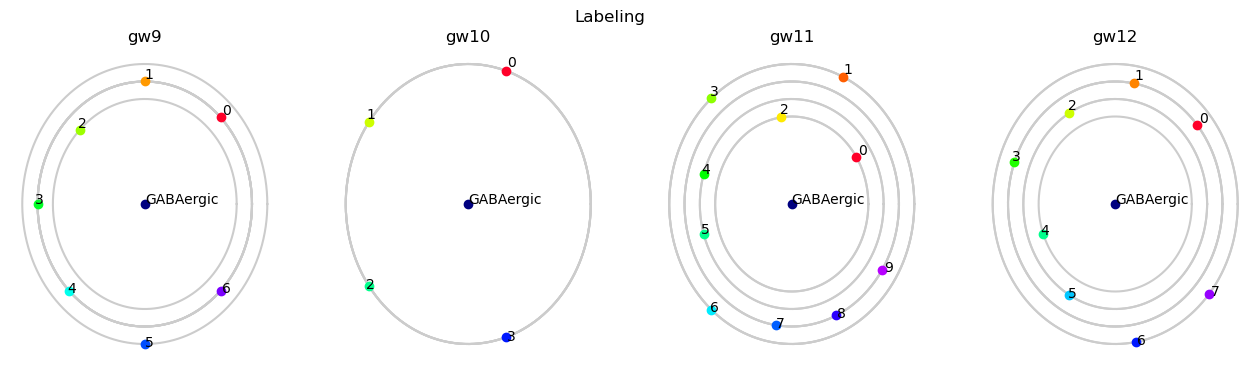

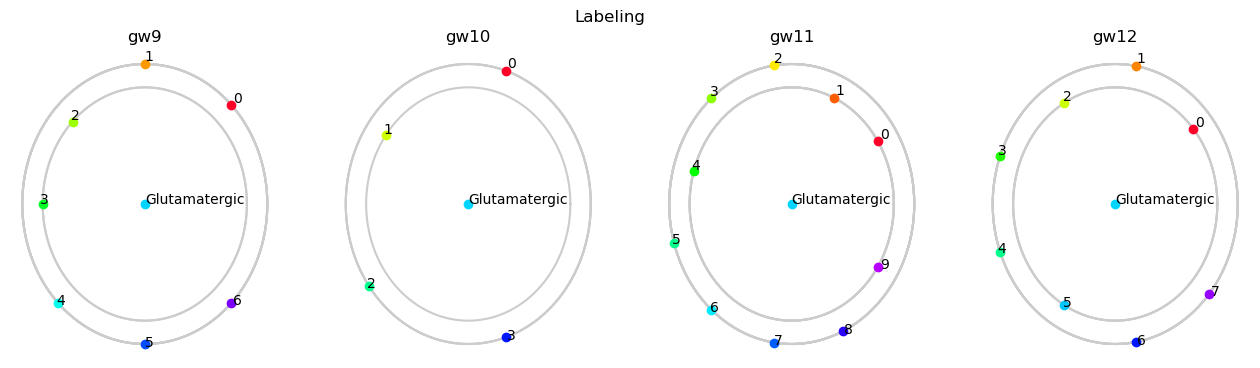

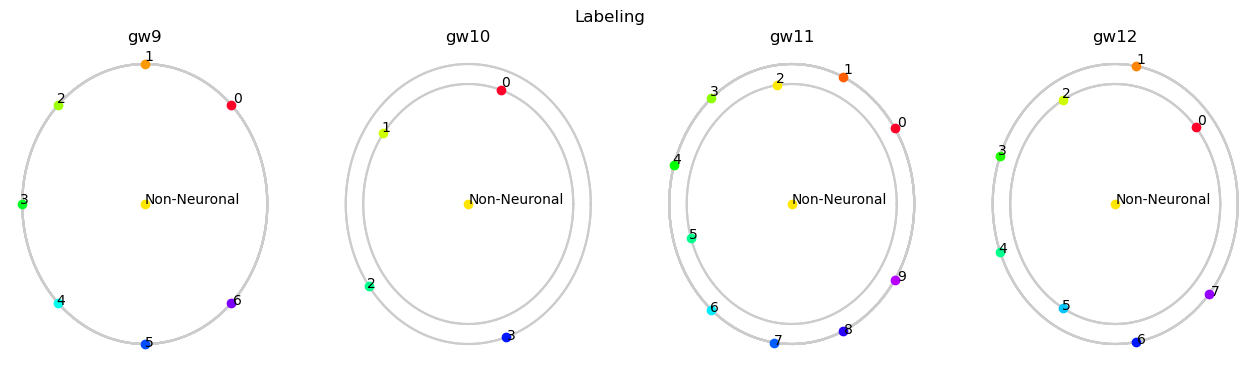

In [9]:
for k in m1_10x:

    fig, ax = plt.subplots(1, 4, figsize=(16, 4))

    for a, o_k, o_kc in zip(ax, dict_gse,  dict_c_gse):
        annot_plot(k, m1_10x, dict_gse[o_k], m_c, dict_c_gse[o_kc], a)
        a.axis("off")
        a.set(title=o_k)
    
    fig.suptitle("Labeling")
    
    if conf.save_file:
        plt.savefig(f"{conf.save_dir}/{k}_labeling.png", **conf.fig_kwarg)

---
## Estimation

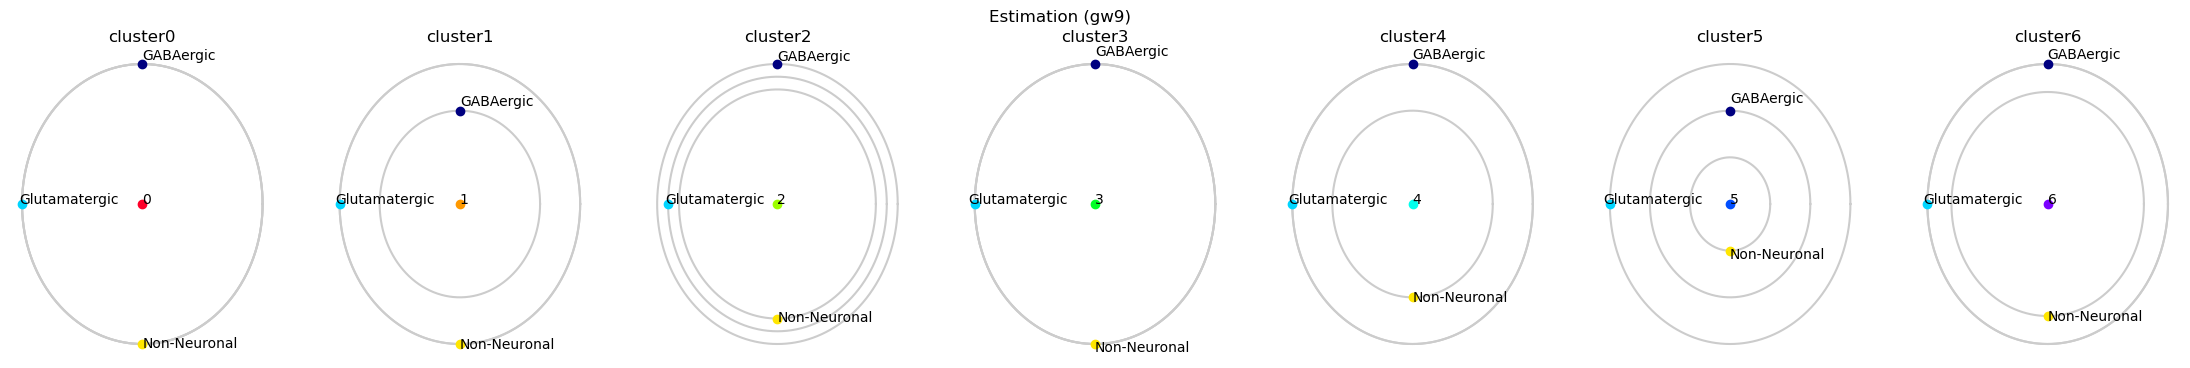

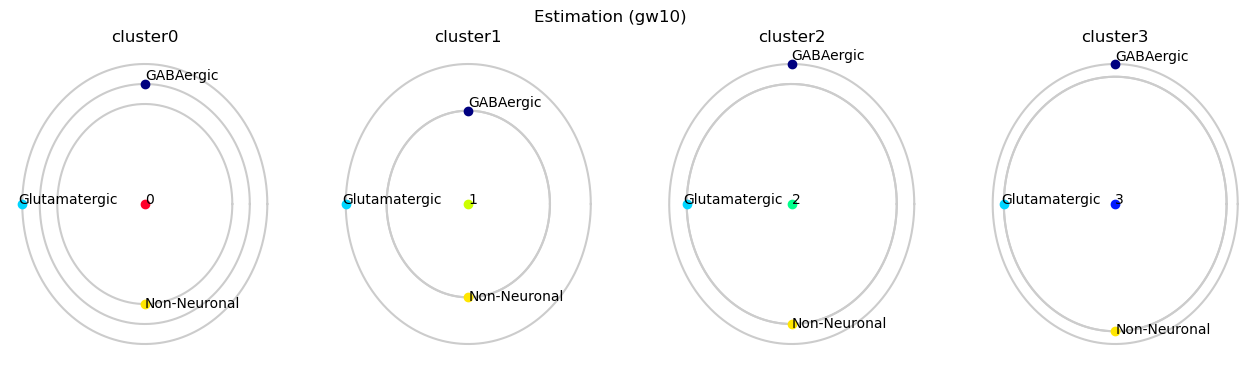

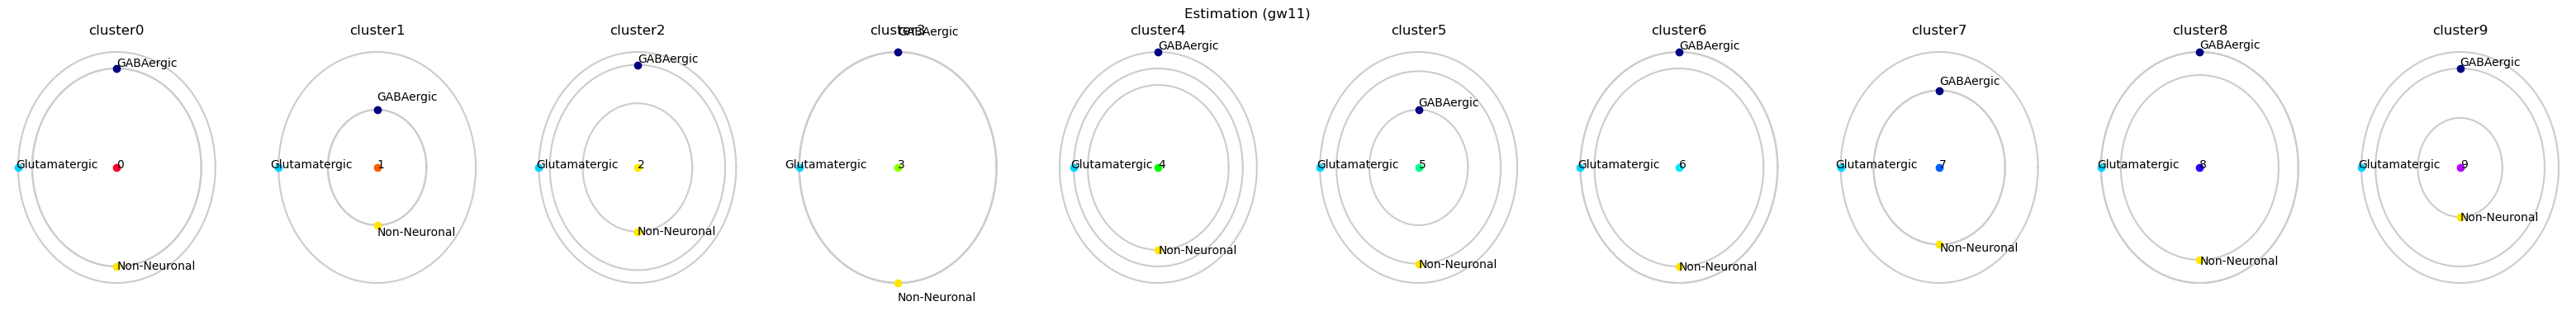

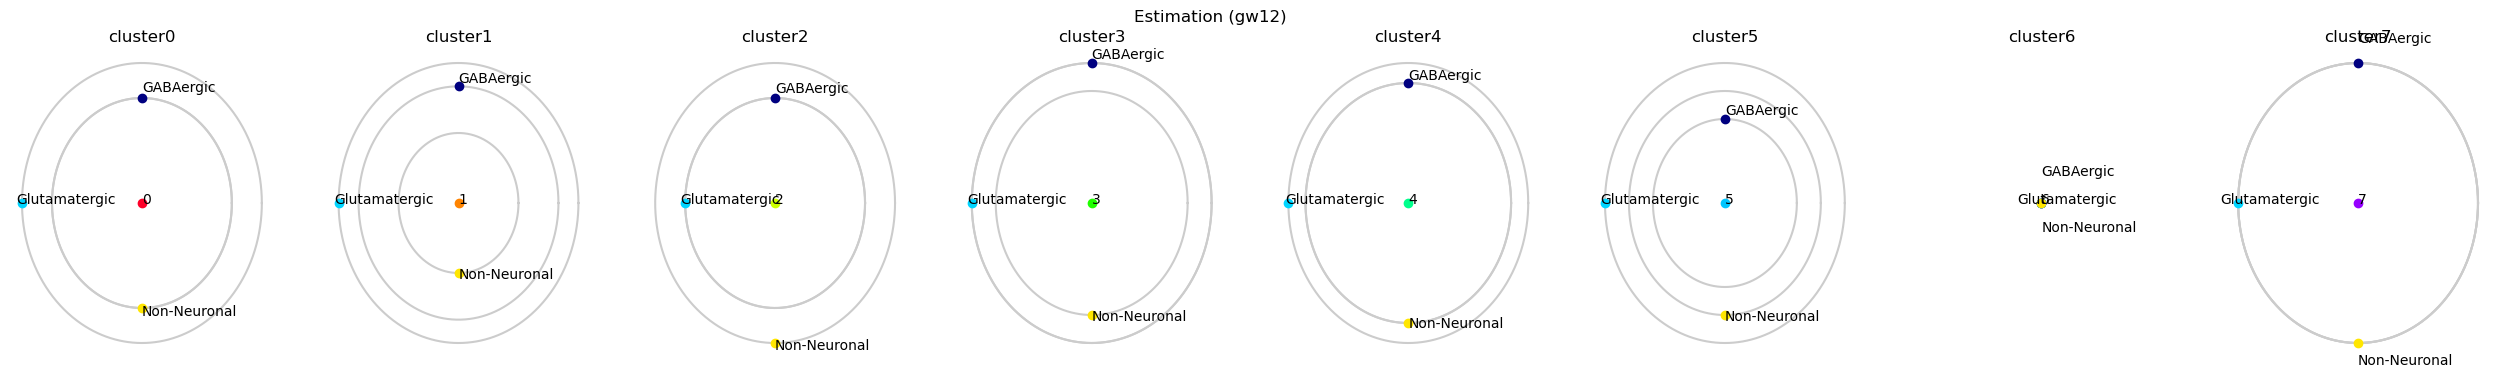

In [10]:
for gw, gw_dict in zip(dict_gse.keys(), dict_gse.values()):
    
    fig, ax = plt.subplots(1, len(gw_dict), figsize=(4 * len(gw_dict), 4))
    
    for a, sbj in zip(ax, gw_dict):
        annot_plot(sbj, gw_dict, m1_10x_whole, dict_c_gse[gw], m_c, a)
        a.axis("off")
        a.set(title=f"cluster{sbj}")
        
    fig.suptitle(f"Estimation ({gw})")
    
    if conf.save_file:
        plt.savefig(f"{conf.save_dir}/{gw}_estimation.png", **conf.fig_kwarg)